--------#### Pset1 Makarova Anastasia, February 10
### *Probabilistic Model of Lecture Attendance*
Consider a probabilistic model of students attending course lectures. Let the course be a mandatory course for a
students, and an optional course for b students. A student attends lecture of a mandatory course with probability p1,
and a lecture of an optional course with probability p2. Denote by c the number of students who attend the lecture.
Then the random variable c|a, b is a sum of two Binomial random variables: Bin(a, p1) and Bin(b, p2).
Now, suppose the lecturer decides to register attending students. During the lecture, she asks everyone present to
write down their names in a list. Each student writes down his own name, and, with probability p3, additionally writes
down his absent friend’s name. We assume that no name appears twice in the list. Denote by d the total number
of students registered on the lecture. Then the random variable d|c is a sum of c and a Binomial random variable
Bin(c, p3).
In order to completely define the probabilistic model, we need to specify priors for a and b. We choose discrete uniform
priors with support [amin, amax] and [bmin, bmax], respectively. Thus, we have specified the following probabilistic
model:

$$ p(a, b, c, d) = p(d|c)p(c|a, b)p(a)p(b)$$

$$ d|c ∼ c + Bin(c, p3), $$

$$ c|a, b ∼ Bin(a, p1) + Bin(b, p2), (1) $$

$$ a ∼ Unif[amin, amax],$$

$$ b ∼ Unif[bmin, bmax].$$

Now, let’s simplify the model 1 slightly. We know that when the number of trials n is large, and probability of
success p is low, we have, with high accuracy, $$Bin(n, p) ≈ Poiss(λ), λ = np$$ We also know that a sum of two Poisson
random variables with parameters λ1 and λ2 is a Poisson random variable with parameter λ1 + λ2. Thus, we can
consider the following approximation of model 1:
$$ p(a, b, c, d) = p(d|c)p(c|a, b)p(a)p(b),$$
$$d|c ∼ c + Bin(c, p3),$$
$$c|a, b ∼ Poiss(ap1 + bp2),$$

#### Assignment

Consider model 2 with parameters amin = 75, amax = 90, bmin = 500, bmax = 600, p1 = 0.1, p2 = 0.01, p3 = 0.3.
Perform the following numerical experiments:

1. Find expected value and variance of marginals for all random variables in the model: a, b, c, d.

2. Study how indirect information improves the estimate of c. To do that, plot the distribution and find the expected
value and variance for distributions p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d), when the parameters a, b, d
equal the expectation of the respective marginals, rounded to the nearest integer.

3. Determine which one of the parameters a, b, d contributes most to improving of the estimate of c (in the sense
of the variance of distribution). Check that D[c|d] < D[c|b] and D[c|d] < D[c|a] for all permissible values of a, b,
d. Are the sets { (a, b) | D[c|b] < D[c|a] } and { (a, b) | D[c|b] ≥ D[c|a] } linearly separable?

4. Measure the time required to estimate the distributions p(c), p(c|a), p(c|b), p(c|d), p(c|a, b), p(c|a, b, d), p(d).

5. Repeat experiments 1-4 for the exact model 1. Compare with results for model 2. Which parameter’s estimate,
and under what conditions, is most different in models 1 and 2? Explain the result.
Use the following permissible values for random variables: for c [0, amax + bmax], for d [0, 2(amax + bmax)].
The estimation of any single distribution should not take more than 30 seconds.
Bonus: if the estimation takes less than a second, you get 0.5 bonus points.

### Solution



* $$ c_{max} = a_{max} + b_{max}$$
* $$p(a) = \frac{1}{a_{max} - a_{min} + 1}$$
* $$p(b)=\frac{1}{b_{max} - b_{min} +1} $$


* $$ E_c = \sum_{c = 0}^{c_{max}} c P(c)$$


* $$ E_d = E_c + \sum_{c=0}^{c = c_{max}}\sum_{k=0}^{k = c}kC_c^kp_3^k(1-p_3)^{c-k}*P(c) = E_c ( 1 + p_3) $$

** Model 2 **


* $$ p(c) = \sum_{a = a_{min}} ^ {a_{max}} \sum_{b = b_{min}}^{b_{max}}\frac{(p_1a +p_2b)^c}{c!} e^{-(p_1a + p_2b)} p(a) p(b) = \\ = p(a) p(b)\sum_{k=0}^{c} \sum_{a = a_{min}} ^ {a_{max}}\frac{(p_1a)^{k}}{k!} e^{- p_1a} \sum_{b = b_{min}}^{b_{max}}\frac{(p_2b)^{c-k}}{(c-k)!} e^{- p_2b}  $$

* $$ p(d) = \sum_{c=0}^{c_{max}}p(d|c)p(c) = \sum_{c=0}^{c_{max}}C_c^{d-c}p_3^{d-c}(1-p_3)^{2c -d}p(c)$$
So it's a sum of antidiagonals of a matrix which consists of $(Binom(c,p_3)p(c))^{c,k=c_{max}}_{c,k=0}$

** Model 1**

* $$p(c)= p(a)*p(b)\sum_{k=0}^{c}\sum_{a = a_{min}} ^ {a_{max}}  f(k; a, p_1) \sum_{b = b_{min}}^{b_{max}}f(c-k;b, p_2)$$
* $$f(k,a,p_1) = C_a^k * p_1^k(1-p_1)^{a-k}$$

In the both models $p(c)$ can be represented as the convolution of distributions for $a$ and $b$


** Here is a big class for all functions and the tasks are lower**

In [343]:
import operator as op
from scipy.stats import poisson, binom
from math import factorial
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc as spm
from time import time

class Attendance:

    def __init__(self, a_min, a_max, b_min, b_max, p1, p2, p3, model):

        self.a_min = a_min
        self.a_max = a_max
        self.b_min = b_min
        self.b_max = b_max
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.c_max = a_max + b_max
        self.d_max = 2*(a_max + b_max)
        self.model = model
        self.eps = 1e-10
        self.excep = -1

    def Ea(self):
        return (self.a_max + self.a_min)/2.0

    def Da (self):
        return ((self.a_max - self.a_min + 1) - 1)**2/12.0
    
    def Db (self):
        return ((self.b_max - self.b_min + 1) - 1)**2/12.0

    def Eb(self):
        return (self.b_max + self.b_min)/2.0
    
#----------------------------------------------------     c     --------------------------------------------
    def pc (self):
        
        a_max = self.a_max
        b_max = self.b_max
        a_min = self.a_min
        b_min = self.b_min

        a = range(a_min, a_max + 1)
        b = range(b_min, b_max + 1)
        c = np.arange(self.c_max + 1)

        if self.model == 2:
        #Model 2
            pois_a = poisson.pmf(range(a_max + 1), np.array(a).reshape(-1, 1) * self.p1)
            pois_b = poisson.pmf(range(b_max + 1), np.array(b).reshape(-1, 1) * self.p2)

            P_c = np.convolve(np.sum(pois_a, axis=0), np.sum(pois_b, axis=0))
            P_c = P_c / sum(P_c)

        if self.model == 1:
        # Model 1
            binom_a = binom.pmf(range(a_max + 1), np.array(a).reshape(-1, 1), self.p1)
            binom_b = binom.pmf(range(b_max + 1), np.array(b).reshape(-1, 1), self.p2)

            P_c = np.convolve(np.sum(binom_a, axis=0), np.sum(binom_b, axis=0))
            P_c = P_c / sum(P_c)

        return P_c

    def Ec (self):
        return np.dot(np.arange(self.c_max + 1), self.pc())
         
    def Dc (self):
        return np.dot((np.arange(self.c_max + 1) - self.Ec())**2, self.pc())

#-------------------------------------------------------   d     ---------------------------------------------- 

    def pd(self):
    
        a_max = self.a_max
        b_max = self.b_max
        c = np.arange(self.c_max + 1)
        pc = self.pc()
    
        d = np.arange(self.d_max + 1)
        pd = []
    
        binom_c = binom.pmf(c, c.reshape(-1, 1), self.p3)
        D = np.multiply(binom_c, np.repeat(pc, len(c)).reshape(len(c), -1))
        for i in range(-self.c_max, self.c_max):
            pd.append(np.trace(np.flipud(D), i))
    
        pd = np.array(pd)
        pd = pd / sum(pd)
    
 
        return pd
        
        
    def Ed(self):
        return np.dot(self.pd(), np.arange(self.d_max))
        
    def Dd(self):    
        return np.dot((np.arange(self.d_max) - self.Ed())**2, self.pd())
    
#--------------------------------------   p(c|...)   ---------------------------------------------------------   

    # p(c|a,b)
    def pc_ab(self, a, b):  
        
        c = np.arange(a + b + 1)

        if self.model == 2:
            p = poisson.pmf(range(a + b + 1), a * self.p1 + b * self.p2)
            p = p / sum(p)

        if self.model == 1:
            binom_a = binom.pmf(range(a + 1), a, self.p1)
            binom_b = binom.pmf(range(b + 1), b, self.p2)
            p = np.convolve(binom_a, binom_b)
            p = p / sum(p)

        return p
    
    def Ec_ab (self):
        a = round(self.Ea())
        b = round(self.Eb())
        return np.dot(np.arange(a + b + 1), self.pc_ab(a, b))
         
    def Dc_ab (self):
        a = round(self.Ea())
        b = round(self.Eb())
        return np.dot((np.arange(a + b + 1) - self.Ec_ab())**2, self.pc_ab(a,b))


#---------------------

    # p(c|a)
    def pc_a(self, a):
        b_min = self.b_min
        b_max = self.b_max
        a_max = self.a_max
        p1 = self.p1
        p2 = self.p2

        b = np.arange(b_min, b_max + 1)   
        c = np.arange(self.c_max + 1)

        if self.model == 2:
            poisson_a = poisson.pmf(range(a_max + 1), a * p1)
            poisson_b = poisson.pmf(range(b_max + 1), b.reshape(-1, 1) * p2)

            p = np.convolve(poisson_a, np.sum(poisson_b, axis=0))
            p = p / sum(p)


        if self.model == 1:
            binom_a = binom.pmf(range(a_max + 1), a,  p1)
            binom_b = binom.pmf(range(b_max + 1), b.reshape(-1, 1),  p2)
            p = np.convolve(binom_a, np.sum(binom_b, axis=0))
            p = p / sum(p)


        p = p / sum(p)

        return p
    
    def Ec_a (self):
        a = round(self.Ea())
        return np.dot(np.arange(self.c_max + 1), self.pc_a(a))
         
    def Dc_a (self):
        a = round(self.Ea())
        return np.dot((np.arange(self.c_max + 1) - self.Ec_a())**2, self.pc_a(a))
    
    def Dc_a_all(self):

        Dc_a_all = []
        for el in range (self.a_min, self.a_max):
            Dc_a_all.append(np.dot((np.arange(self.c_max + 1))**2, self.pc_a(el)) 
                            - (np.dot(self.pc_a(el), np.arange(self.c_max + 1)))**2)
        
        return np.array(Dc_a_all)
    
#---------------------    
    
    # p(c|b)
    def pc_b(self, b):
        b_min = self.b_min
        b_max= self.b_max
        a_max = self.a_max
        a_min = self.a_min
        p1 = self.p1
        p2 = self.p2

        a = np.arange(a_min, a_max + 1)   
        c = np.arange(self.c_max + 1)

        if self.model == 2:
            poisson_b = poisson.pmf(range(b_max + 1), b * p2)
            poisson_a = poisson.pmf(range(a_max + 1), a.reshape(-1, 1) * p1)

            p = np.convolve(poisson_b, np.sum(poisson_a, axis=0))
            p = p / sum(p)


        if self.model == 1:
            binom_b = binom.pmf(range(b_max + 1), b,  p2)
            binom_a = binom.pmf(range(a_max + 1), a.reshape(-1, 1),  p1)
            p = np.convolve(binom_b, np.sum(binom_a, axis=0))
            p = p / sum(p)


        p = p / sum(p)

        return p
    
    def Ec_b (self):
        b = round(self.Eb())
        return np.dot(np.arange(self.c_max + 1), self.pc_b(b))
         
    def Dc_b (self):
        b = round(self.Eb())
        return np.dot((np.arange(self.c_max + 1) - self.Ec_b())**2, self.pc_b(b))
    
    def Dc_b_all(self):
        
        
        Dc_b_all = []
        for el in range (self.b_min, self.b_max):
            Dc_b_all.append(np.dot((np.arange(self.c_max + 1))**2, self.pc_b(el)) 
                            - (np.dot(self.pc_b(el), np.arange(self.c_max + 1)))**2)
        return np.array(Dc_b_all)

#---------------------    
    
    
    # p(c|d)
    def pc_d(self, d):
        
        p3 = self.p3
        a_max = self.a_max
        b_max = self.b_max
        c = np.arange(self.c_max + 1)

        p_c = self.pc()

        binom_c = binom.pmf(c, c.reshape(-1, 1), p3) 

        D = np.multiply(binom_c, np.repeat(p_c, len(c)).reshape(len(c), -1))
        p = np.diagonal(np.flipud(D), np.int(d) - c.max())[::-1]

        p = np.concatenate((np.zeros(max(d-c.max(), 0)), p))
        p = np.concatenate((p, np.zeros(len(c) - len(p))))

        if sum(p) > 0:
            p = p / sum(p)


        return p
     
    def Ec_d(self):
        d = round(self.Ed())
        return np.dot(np.arange(self.c_max + 1), self.pc_d(d))

    def Dc_d (self):
        d = round(self.Ed())
        return np.dot((np.arange(self.c_max + 1) - self.Ec_d())**2, self.pc_d(d))
    
    def Dc_d_all(self):
        d = np.arange(self.d_max + 1)
        Dc_d_all = []
        for el in d:
            Dc_d_all.append(np.dot((np.arange(self.c_max + 1))**2, self.pc_d(el)) - 
                            (np.dot(self.pc_d(el), np.arange(self.c_max + 1)))**2)
        return np.array(Dc_d_all)
    
    
#---------------------

        # p(c|a,b,d)
    def pc_abd(self, a, b, d):

        c = np.arange(min(a + b, d) + 1)
        p_cab = self.pc_ab(a, b)[:c.max() + 1]
        binom_c = binom.pmf(range(c.max() + 1), c.reshape(-1, 1), self.p3) 

        D = np.multiply(binom_c, np.repeat(p_cab, len(c)).reshape(len(c), -1))
        p = np.diagonal(np.flipud(D), d - c.max())[::-1]

        p = np.array(p)
        p = p / sum(p)
        
        return p
    
    def Ec_abd(self):
        d = int(round(self.Ed()))
        a = int(round(self.Ea()))
        b = int(round(self.Eb()))
        return np.dot(np.arange(min(a + b, d) + 1), self.pc_abd(a,b,d))

    def Dc_abd (self):
        d = int(round(self.Ed()))
        a = int(round(self.Ea()))
        b = int(round(self.Eb()))
        return np.dot((np.arange(min(a + b, d) + 1) - self.Ec_abd())**2, self.pc_abd(a,b,d))
    
    
#--------------------------------------   p(d|...)   ---------------------------------------------------------   

    # p(d|c)
#     def pd_c(self, c):

#         d = np.arange(c, 2 * c + 1)
#         p = binom.pmf(d-c, c, self.p3)
#         p = p / sum(p)

#         return p

    
#----------------------------------------------------------------------------------------------------------
    
M2 = Attendance(a_min = 75, a_max = 90, b_min = 500, b_max = 600, p1 = 0.1, p2 = 0.01, p3 = 0.3, model = 2)
M1 = Attendance(a_min = 75, a_max = 90, b_min = 500, b_max = 600, p1 = 0.1, p2 = 0.01, p3 = 0.3, model = 1)

## Task $1$

In [261]:
M2 = Attendance(a_min = 75, a_max = 90, b_min = 500, b_max = 600, p1 = 0.1, p2 = 0.01, p3 = 0.3, model = 2)
M1 = Attendance(a_min = 75, a_max = 90, b_min = 500, b_max = 600, p1 = 0.1, p2 = 0.01, p3 = 0.3, model = 1)

In [238]:
print 'Expectation a: Ea = {}, variance a: Da = {}'.format(M2.Ea(), M2.Da())
print 'Expectation b: Eb = {}, variance b: Db = {}'.format(M1.Eb(), M1.Db())

print '\nModel 2: Expectation c: Ec = {}, variance c: Dc = {}'.format(M2.Ec(), M2.Dc())
print 'Model 1: Expectation c: Ec = {}, variance c: Dc = {}'.format(M1.Ec(), M1.Dc())

print '\nModel 2: Expectation d: Ed = {}, variance d: Dd = {}'.format(M2.Ed(), M2.Dd())
print 'Model 1: Expectation d: Ed = {}, variance d: Dd = {}'.format(M1.Ed(), M1.Dd())

Expectation a: Ea = 82.5, variance a: Da = 18.75
Expectation b: Eb = 550.0, variance b: Db = 833.333333333

Model 2: Expectation c: Ec = 13.75, variance c: Dc = 14.0475
Model 1: Expectation c: Ec = 13.75, variance c: Dc = 13.1675

Model 2: Expectation d: Ed = 17.875, variance d: Dd = 26.627775
Model 1: Expectation d: Ed = 17.875, variance d: Dd = 25.140575


### Task $2$
#### Plot Distributions

In [290]:
# Expectation and variance of p(c|a) 
print 'Model 2: Expectation c: Ec = {}, variance on c: Dc = {}'.format(M2.Ec_a(), M2.Dc_a())
print 'Model 1: Expectation c: Ec = {}, variance on c: Dc = {}\n'.format(M1.Ec_a(), M1.Dc_a())

Model 2: Expectation c: Ec = 13.8, variance on c: Dc = 13.885
Model 1: Expectation c: Ec = 13.8, variance on c: Dc = 13.0



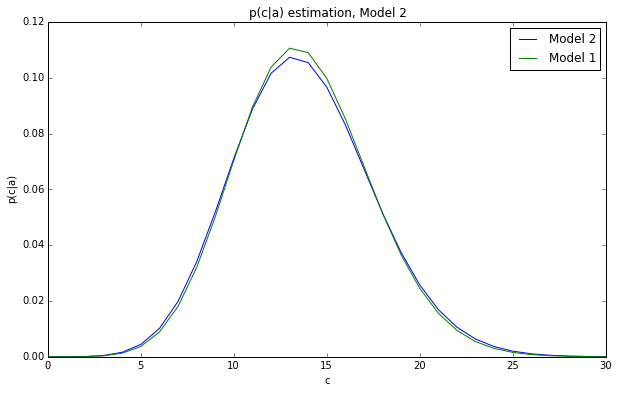

In [268]:
fig = plt.figure(figsize=(10, 6))
plt.title('p(c|a) estimation, Model 2')
plt.xlabel('c')
plt.ylabel('p(c|a)')

pc_a = M2.pc_a(a = M2.Ea())
plt.plot(np.arange(M2.c_max + 1), pc_a, label='Model 2')

# p(c) plot for Model 1
pc_a = M1.pc_a(a = M1.Ea())
plt.plot(np.arange(M2.c_max + 1), pc_a, label='Model 1')

plt.legend(loc='best')
plt.xlim(0, 30)
plt.show()

In [291]:
# Expectation and variance of p(c|b) 
print 'Model 2: Expectation c: Ec = {}, variance on c: Dc = {}'.format(M2.Ec_b(), M2.Dc_b())
print 'Model 1: Expectation c: Ec = {}, variance on c: Dc = {}\n'.format(M1.Ec_b(), M1.Dc_b())

Model 2: Expectation c: Ec = 13.75, variance on c: Dc = 13.9625
Model 1: Expectation c: Ec = 13.75, variance on c: Dc = 13.0825



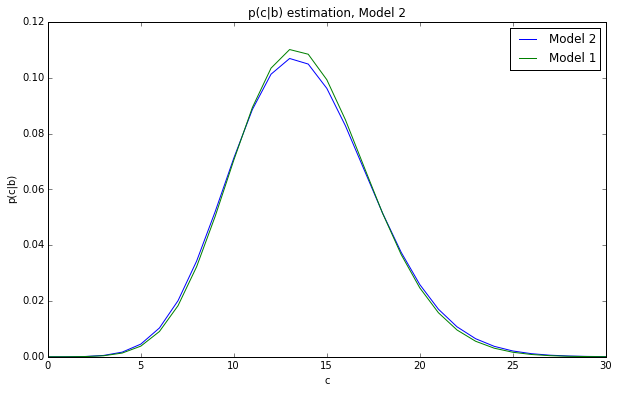

In [270]:
fig = plt.figure(figsize=(10, 6))
plt.title('p(c|b) estimation, Model 2')
plt.xlabel('c')
plt.ylabel('p(c|b)')

pc_b = M2.pc_b(b = M2.Eb())
plt.plot(np.arange(M2.c_max + 1), pc_b, label='Model 2')

# p(c) plot for Model 1
pc_b = M1.pc_b(b = M1.Eb())
plt.plot(np.arange(M2.c_max + 1), pc_b, label='Model 1')

plt.legend(loc='best')
plt.xlim(0, 30)
plt.show()

In [292]:
# Expectation and variance of p(c|d) 
print 'Model 2: Expectation c: Ec = {}, variance on c: Dc = {}'.format(M2.Ec_d(), M2.Dc_d())
print 'Model 1: Expectation c: Ec = {}, variance on c: Dc = {}\n'.format(M1.Ec_d(), M1.Dc_d())

Model 2: Expectation c: Ec = 13.8938338922, variance on c: Dc = 1.5439433291
Model 1: Expectation c: Ec = 13.895970599, variance on c: Dc = 1.53358170067



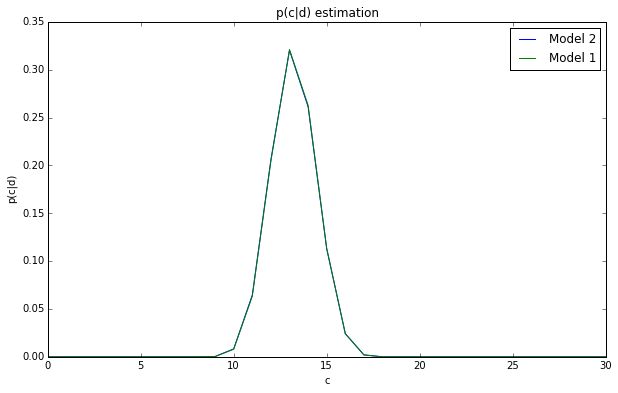

In [293]:
fig = plt.figure(figsize=(10, 6))
plt.title('p(c|d) estimation')
plt.xlabel('c')
plt.ylabel('p(c|d)')

pc_d = M2.pc_d(d = M2.Ed())
plt.plot(np.arange(M2.c_max + 1), pc_d, label='Model 2')

# p(c) plot for Model 1
pc_d = M1.pc_d(d = M1.Ed())
plt.plot(np.arange(M2.c_max + 1), pc_d, label='Model 1')

plt.legend(loc='best')
plt.xlim(0, 30)
plt.show()

In [314]:
# Expectation and variance of p(c|abd) 
print 'Model 2: Expectation c: Ec = {}, variance c: Dc = {}'.format(M2.Ec_abd(), M2.Dc_abd())
print 'Model 1: Expectation c: Ec = {}, variance c: Dc = {}\n'.format(M1.Ec_abd(), M1.Dc_abd())

Model 2: Expectation c: Ec = 13.900175167, variance c: Dc = 1.54088384958
Model 1: Expectation c: Ec = 13.9027555944, variance c: Dc = 1.53014020852



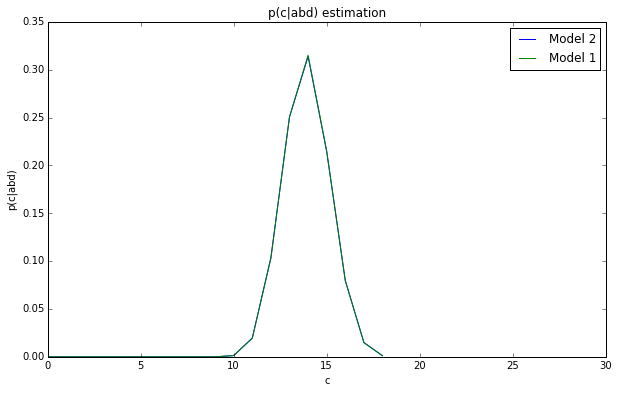

In [319]:
a = int(round(M1.Ea()))
b = int(round(M1.Eb()))
d1 = int(round(M1.Ed()))
d2 = int(round(M2.Ed()))

fig = plt.figure(figsize=(10, 6))
plt.title('p(c|abd) estimation')
plt.xlabel('c')
plt.ylabel('p(c|abd)')

pc_abd = M2.pc_abd(a, b, d2)
plt.plot(np.arange(min(a + b, d2) + 1), pc_abd, label='Model 2')

# p(c) plot for Model 1
pc_abd = M1.pc_abd(a, b, d1)
plt.plot(np.arange(min(a + b, d1) + 1), pc_abd, label='Model 1')

plt.legend(loc='best')
plt.xlim(0, 30)
plt.show()

Of course, the information about d highly impoves the estimation of c, as we can see it from the variance. The additional information about a and b doesn't change the situation significantly. 

### Task 3

Check that $D[c|d] < D[c|b]$ and $D[c|d] < D[c|a]$ for all permissible values of a, b,d. 

Are the sets $\{ (a, b) | D[c|b] < D[c|a] \}$ and $\{ (a, b) | D[c|b] ≥ D[c|a] \}$ linearly separable?

In [344]:
Dc_a_1 = M1.Dc_a_all() # Model 1
Dc_a_2 = M2.Dc_a_all() # Model 2

Dc_b_1 = M1.Dc_b_all()
Dc_b_2 = M2.Dc_b_all()

Dc_d_1 = M1.Dc_d_all()
Dc_d_2 = M2.Dc_d_all()

In [345]:
print max(Dc_d_1) < min(Dc_b_1) # Model 1
print max(Dc_d_2) < min(Dc_b_2) # Model 2

True
True


In [346]:
print max(Dc_d_1) < min(Dc_a_1) # Model 1
print max(Dc_d_2) < min(Dc_a_2) # Model 2

True
True


### Task $4$
#### Timing

In [322]:
import time 
import numpy as np

a = int(round(M1.Ea()))
b = int(round(M1.Eb()))
d1 = int(round(M1.Ed()))
d2 = int(round(M2.Ed()))
# p(c)
start_time = time.time()
M1.pc()
print 'time p(c) model 1: ',  round(time.time() - start_time,4), 'sec'
start_time = time.time()
M2.pc()
print 'time p(c) model 2: ',  round(time.time() - start_time,4), 'sec'    

# p(c|a)    

start_time = time.time()
M1.pc_a(a)
print '\ntime p(c|a) model 1: ', round(time.time() - start_time,4), 'sec'
start_time = time.time()
M2.pc_a(a)
print 'time p(c|a) model 2: ', round(time.time() - start_time,4), 'sec'    
    
# p(c|b)

start_time = time.time()
M1.pc_b(b)
print '\ntime p(c|b) model 1: ', round(time.time() - start_time, 4), 'sec'
start_time = time.time()
M2.pc_b(b)
print 'time p(c|b) model 2: ', round(time.time() - start_time, 4), 'sec'

# p(c|ab)
start_time = time.time()
M1.pc_ab(a,b)
print '\ntime p(c|ab) model 1:', round(time.time() - start_time, 4), 'sec'
# p(c|ab)
start_time = time.time()
M2.pc_ab(a,b)
print 'time p(c|ab) model 2: ', round(time.time() - start_time, 4), 'sec'
    
# p(c|d)
start_time = time.time()
M1.pc_d(d1)
print '\ntime p(c|d) model 1: ', round(time.time() - start_time, 4), 'sec'  
start_time = time.time()
M2.pc_d(d2)
print 'time p(c|d) model 2: ', round(time.time() - start_time, 4), 'sec'    

#p(c|abd)
start_time = time.time()
M1.pc_abd(a,b,d1)
print '\ntime p(c|abd) model 1: ', round(time.time() - start_time, 4), 'sec'
start_time = time.time()
M2.pc_abd(a,b,d2)
print 'time p(c|abd) model 2: ', round(time.time() - start_time, 4), 'sec'

#p(d)
start_time = time.time()
M1.pd()
print '\ntime p(d) model 1: ', round(time.time() - start_time, 4), 'sec'
start_time = time.time()
M2.pd()
print 'time p(d) model 2: ', round(time.time() - start_time, 4), 'sec'

time p(c) model 1:  0.0417 sec
time p(c) model 2:  0.0256 sec

time p(c|a) model 1:  0.0397 sec
time p(c|a) model 2:  0.0349 sec

time p(c|b) model 1:  0.003 sec
time p(c|b) model 2:  0.0023 sec

time p(c|ab) model 1: 0.0018 sec
time p(c|ab) model 2:  0.001 sec

time p(c|d) model 1:  0.33 sec
time p(c|d) model 2:  0.2682 sec

time p(c|abd) model 1:  0.003 sec
time p(c|abd) model 2:  0.0017 sec

time p(d) model 1:  0.3075 sec
time p(d) model 2:  0.3619 sec


Every estimation costs less than second :)